# Data Scientists Salary

Data science jobs are some of the fastest-growing, most in-demand in technology. 
Since 2012, Data Scientist roles have increased by 650 percent, and this rise shows no sign of stopping. 
The U.S. Bureau of Labor Statistics predicts that the demand for data science skills will increase another 27.9 percent by 2026.
And, according to a report from McKinsey, that spells a shortage of between 140,000 and 190,000 people with analytical skills 
in the U.S. alone—not to mention another 1.5 million managers and analysts who will be required to understand how data analysis
drives decision-making.

Data Scientist salaries have also risen with demand; Data Scientists can typically expect to make six figures.
Demand also translates into an ability to relocate far more easily—from city to city, and even internationally.

## Assignment Definition

With the provided Dataset, I am to conduct an EDA showing;

 1.Every feature in the dataset;
 
 2.Work Year Analysis(with Salary, Remote Ratio);
 
 3.Experience Level Analysis (with Employment Type, Top 3 Job Title, Company Size)
 
 4.Company Location Analysis (with Experience Level)
 
 5.Salary Analysis (with Work Year, Experience Level, Company Size, Job Title, Remote Ratio)


In [161]:
# import python libraries

import pandas as pd
import numpy as np

# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
data = pd.read_csv('C:\\Users\\dell\\Desktop\\ds_salaries.csv')
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Data Dictionary

Below are the columns and features of the Data Science Salaries dataset;

work_year: The year the salary was paid.
    
experience_level: The experience level in the job during the year with the following possible values: 
                  EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
            
employment_type: The type of employement for the role: PT (Part-time), FT (Full-time), CT (Contract-time), FL (Freelance)
        
job_title: The role worked in during the year.
    
salary: The total gross salary amount paid.
    
salary_currency: The currency of the salary paid as an ISO 4217 currency code
    
salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
    
employee_residence: Employee primary country of residence in during the work year as an ISO 3166 country code.
    
remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%)
              50 (Partially remote), 100 Fully remote (more than 80%)
            
company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
    
company_size: The average number of people that worked for the company during the year: S-less than 50 employees (small)
               M-50 to 250 employees (medium), and L-more than 250 employees (large)




In [163]:
data.shape

(607, 12)

In [164]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [166]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<AxesSubplot:title={'center':'missing data'}>

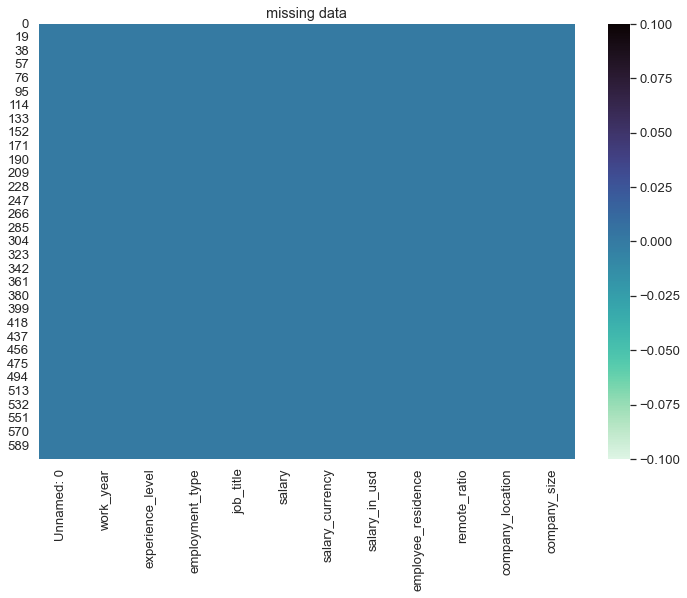

In [167]:
# graphical representation of missing data

plt.figure(figsize =(12,8))
plt.title('missing data')
sns.heatmap(data.isnull(),cbar=True, cmap='mako_r')

<AxesSubplot:>

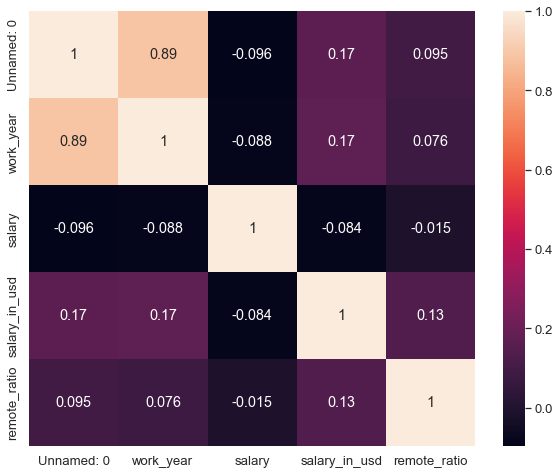

In [168]:
# correlations on my data set columns using a seaborn heatmap

plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),annot=True)

# Univariate Analysis
### Categorical columns

##### Job Title

In [169]:
data['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Text(0, 0.5, 'frequency')

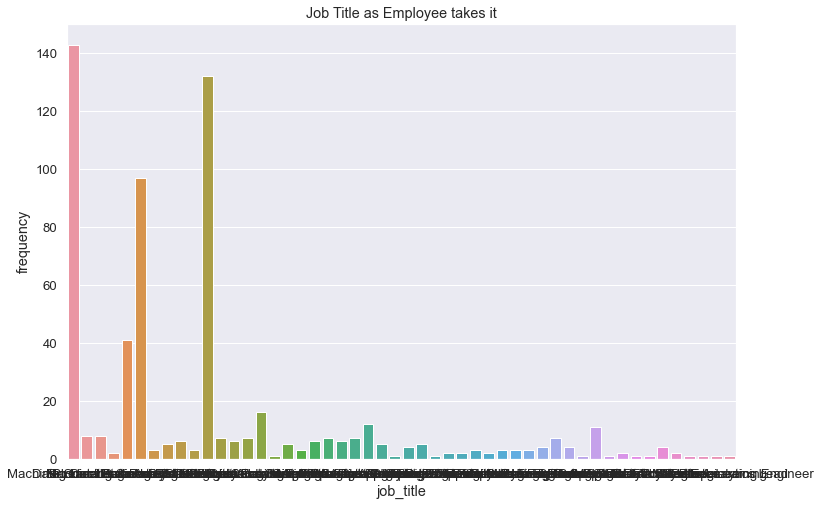

In [170]:
# Title of job Base on Employees?

plt.figure(figsize=(12,8))
plt.title("Job Title as Employee takes it")
sns.countplot(x="job_title",data=data)
plt.xlabel("job_title")
plt.ylabel("frequency")

##### Employment Type

In [171]:
data['employment_type'].value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Text(0, 0.5, 'frequency')

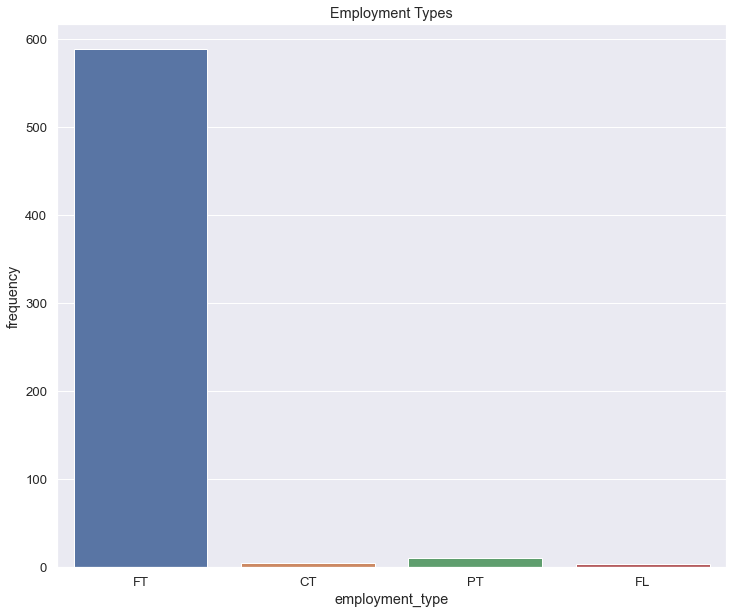

In [172]:
# Available Emplyment Types?

plt.figure(figsize=(12,10))
plt.title("Employment Types")
sns.countplot(x="employment_type",data=data)
plt.xlabel("employment_type")
plt.ylabel("frequency")

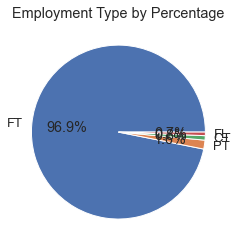

<Figure size 864x720 with 0 Axes>

In [173]:
#using pie chart to visualize the employment Type

plt.pie(data.groupby('employment_type').salary_in_usd.count().sort_values(ascending=False),
        labels=data.groupby('employment_type').salary_in_usd.count().sort_values(ascending=False).index, autopct="%.1f%%")
plt.title('Employment Type by Percentage',loc ='center', )
plt.show()

plt.figure(figsize=(12,10))
sns.set_theme(font_scale=0.8)

##### Experience Level

In [174]:
data['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

Text(0, 0.5, 'frequency')

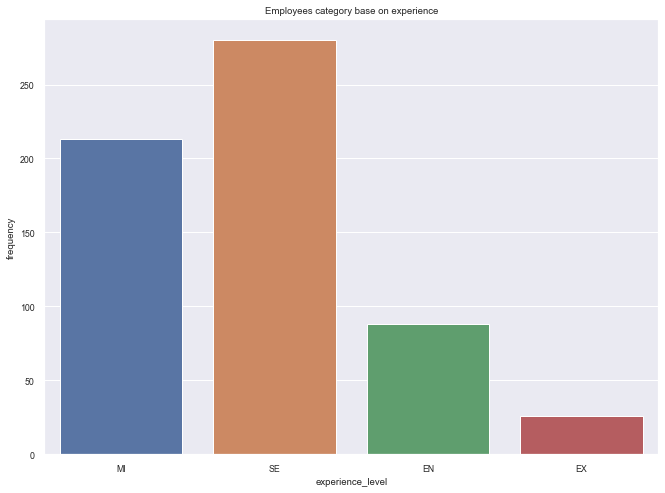

In [175]:
# Categories of Employees Base on Experience?

plt.figure(figsize=(11,8))
plt.title("Employees category base on experience")
sns.countplot(x="experience_level",data=data)
plt.xlabel("experience_level")
plt.ylabel("frequency")

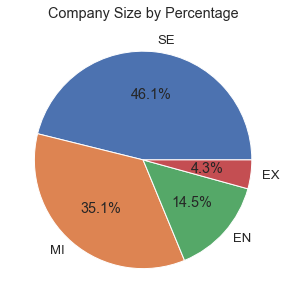

In [176]:
#using pie chart to visualize the experience level

sns.set_theme(font_scale=1.2)

plt.figure(figsize=(5,5))
plt.pie(data.groupby('experience_level').salary_in_usd.count().sort_values(ascending=False),
        labels=data.groupby('experience_level').salary_in_usd.count().sort_values(ascending=False).index, autopct="%.1f%%")
plt.title('Company Size by Percentage',loc ='center', )
plt.show()

##### Employee Residence

In [177]:
data['employee_residence'].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

Text(0, 0.5, 'frequency')

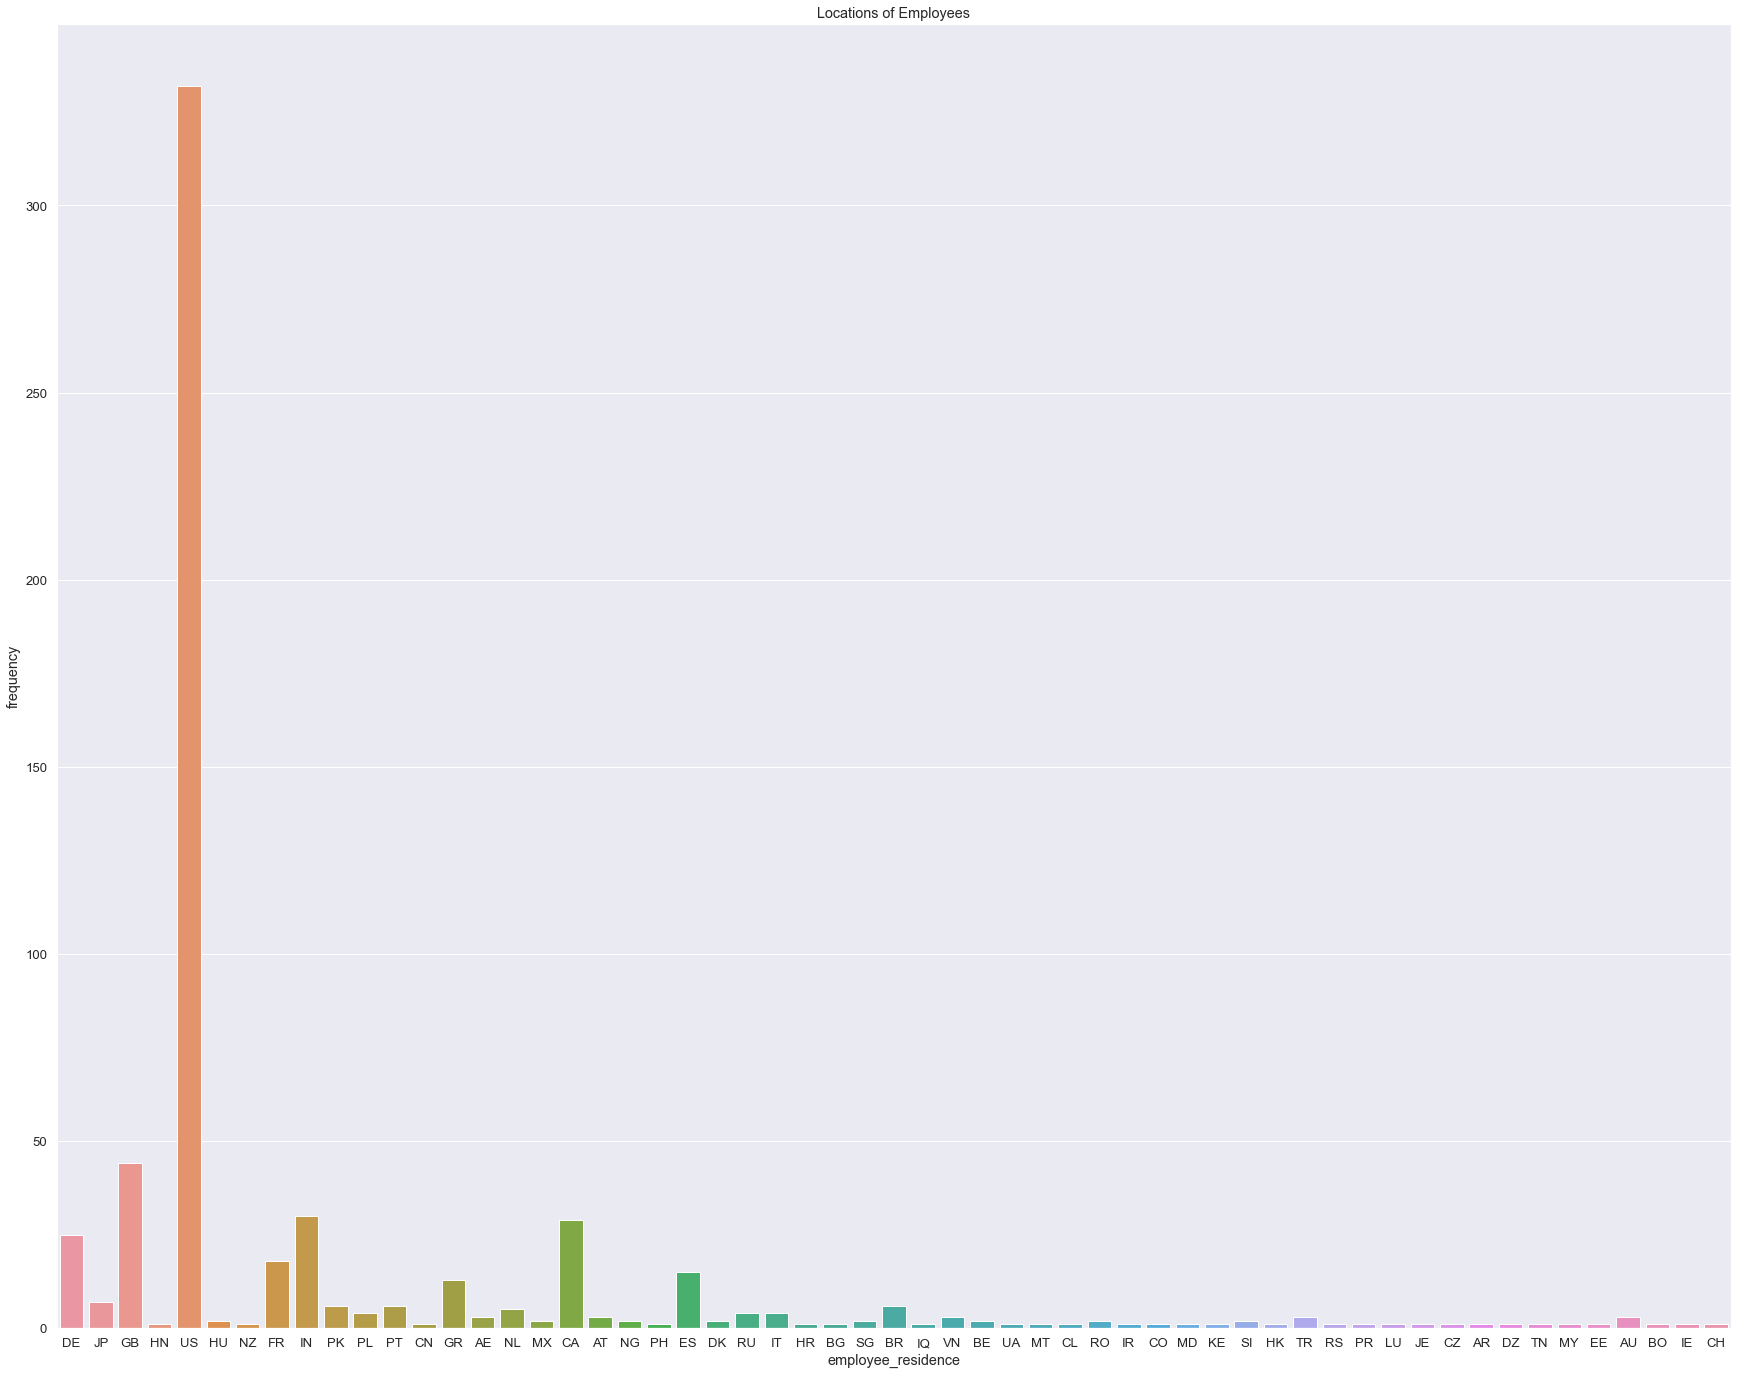

In [178]:
# Locations of the employees

plt.figure(figsize=(30,24))
plt.title("Locations of Employees")
sns.countplot(x="employee_residence",data=data)
plt.xlabel("employee_residence")
plt.ylabel("frequency")



##### Company Location

In [179]:
data['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Text(10, 10, '6')

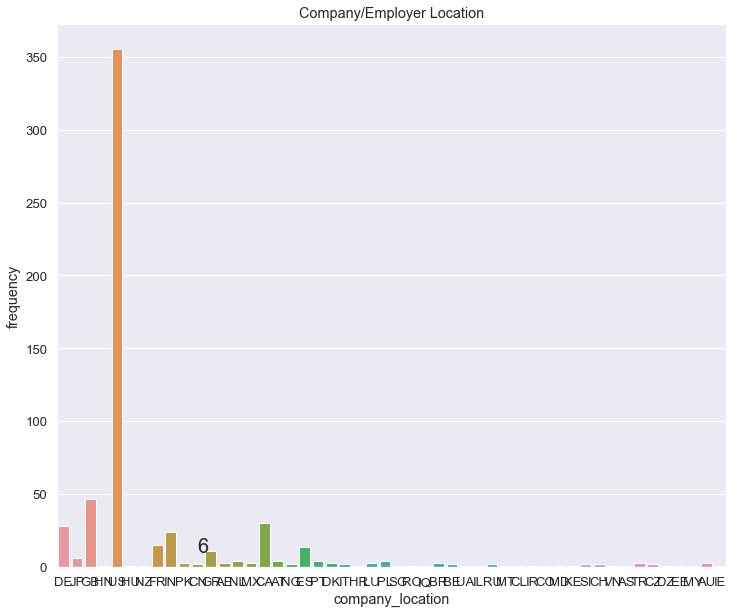

In [180]:
# Employers Locations

plt.figure(figsize=(12,10))
plt.title("Company/Employer Location")
sns.countplot(x="company_location",data=data)
plt.xlabel("company_location")
plt.ylabel("frequency")

plt.text(x=10, y=10, s=6, fontsize=20)

#### company size

In [181]:
data['company_size'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

Text(0, 0.5, 'frequency')

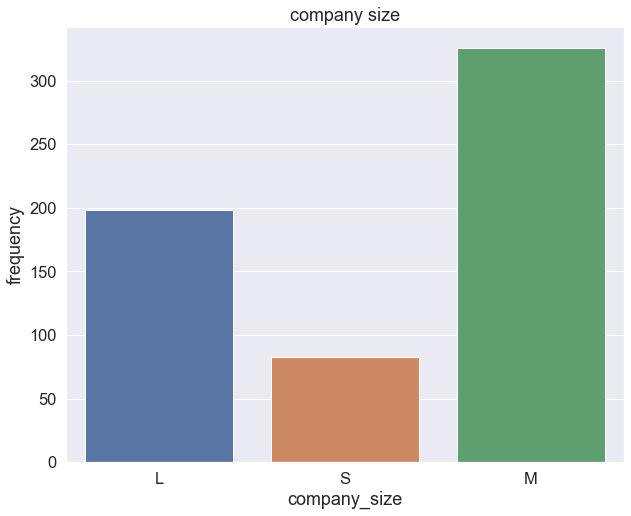

In [206]:
# Employers size

plt.figure(figsize=(10,8))
plt.title("company size")
sns.countplot(x="company_size",data=data)
plt.xlabel("company_size")
plt.ylabel("frequency")

## Univariate (Numeric Columns)


##### work year

In [183]:
#Work Year 

data.groupby('work_year').work_year.count().sort_values(ascending=True)


work_year
2020     72
2021    217
2022    318
Name: work_year, dtype: int64

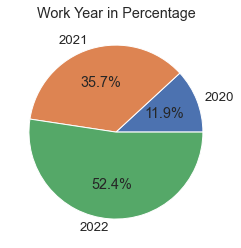

In [184]:
# work year in pie chart

plt.pie(data.groupby('work_year').work_year.count().sort_values(ascending=True),
        labels= data.groupby('work_year').work_year.count().sort_values(ascending=True).index, autopct="%.1f%%")
plt.title('Work Year in Percentage',loc ='center', )
plt.show()

Text(0, 0.5, 'frequency')

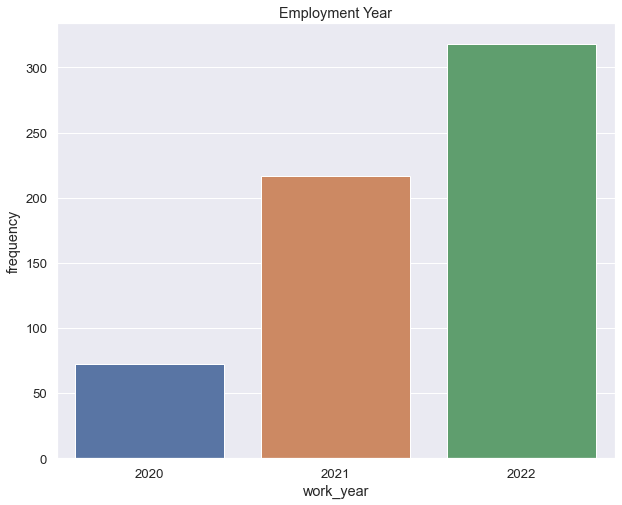

In [185]:
# work year in barchart
plt.figure(figsize=(10,8))
plt.title("Employment Year")
sns.countplot(x="work_year",data=data)
plt.xlabel("work_year")
plt.ylabel("frequency")

#### salary in USD

In [186]:
data['salary_in_usd'].value_counts()

100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 369, dtype: int64

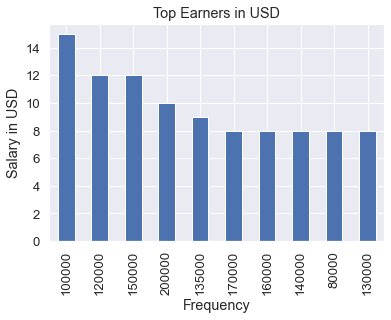

In [187]:
#use horizontal bar chart to visualizing top earners

data['salary_in_usd'].value_counts().head(10).plot.bar('salary_in_usd')
plt.title('Top Earners in USD',loc ='center', )

plt.xlabel("Frequency")
plt.ylabel("Salary in USD")


plt.show()

<AxesSubplot:>

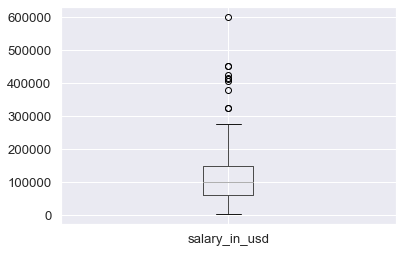

In [188]:
# Visualizing salary in usd using boxplot

data.boxplot('salary_in_usd')

##### Remote Ratio

In [189]:
data['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

Text(0, 0.5, 'frequency')

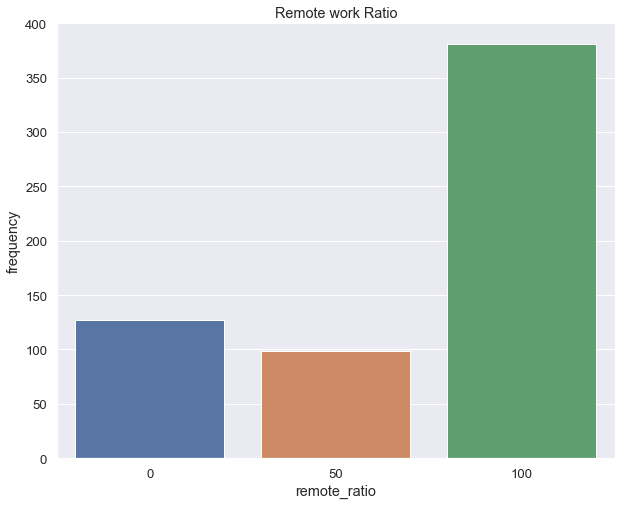

In [190]:
# Ratio of Remote Work

plt.figure(figsize=(10,8))
plt.title("Remote work Ratio")
sns.countplot(x="remote_ratio",data=data)
plt.xlabel("remote_ratio")
plt.ylabel("frequency")

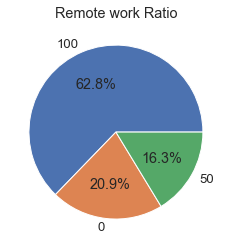

In [191]:
# remote ratio in pie chart

plt.pie(data.groupby('remote_ratio').work_year.count().sort_values(ascending=False),labels= 
        data.groupby('remote_ratio').work_year.count().sort_values(ascending=False).index, autopct="%.1f%%")

plt.title('Remote work Ratio',loc ='center', )
plt.show()



# Work Year Analysis


#### Remote Ratio By Work Year

Text(0, 0.5, 'Remote Ratio')

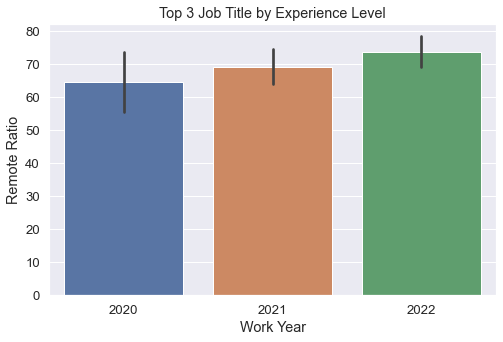

In [192]:
#Remote ratio by work year

plt.figure(figsize=(8,5))
plt.title('Top 3 Job Title by Experience Level')
sns.barplot(x='work_year', y='remote_ratio', data=data)
plt.xlabel("Work Year")
plt.ylabel("Remote Ratio")

Text(0, 0.5, 'Salary in USD')

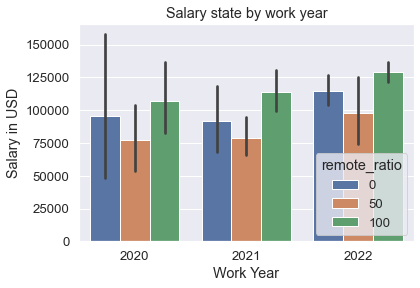

In [193]:
# increase in salary by work year

plt.title('Salary state by work year',loc ='center', )
sns.barplot(x='work_year', y='salary_in_usd', data=data, hue='remote_ratio')
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")



# Experience Level Analysis


##### Employment Type By Experience Level

Text(0, 0.5, 'Salary in USD')

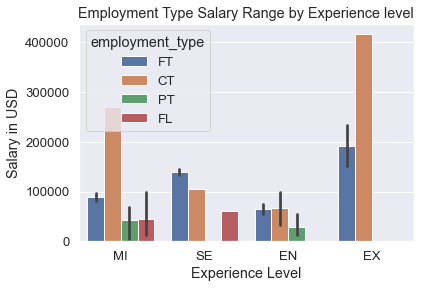

In [194]:
#Experience Level

sns.barplot(x='experience_level', y='salary_in_usd', data=data, hue='employment_type')
plt.title('Employment Type Salary Range by Experience level',loc ='center', )
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")

##### Company Size By Experience Level

Text(0, 0.5, 'Salary in USD')

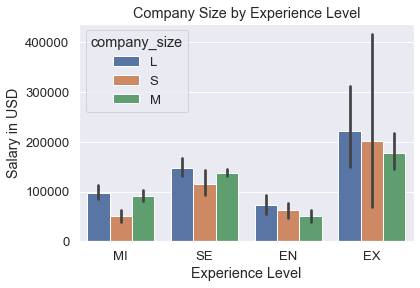

In [195]:
# company size by experience level

sns.barplot(x='experience_level', y='salary_in_usd', data=data, hue='company_size')
plt.title('Company Size by Experience Level')
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")

##### Top 3 Job title by expereince level

Text(0, 0.5, 'Salary in USD')

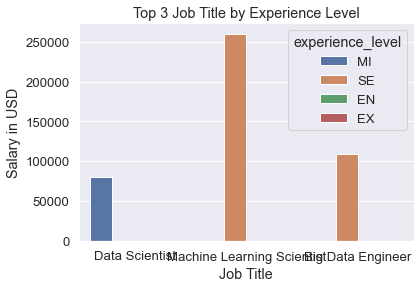

In [196]:
#Top 3 Job title by expereince level

plt.title('Top 3 Job Title by Experience Level')
sns.barplot(x=data.job_title[:3], y='salary_in_usd', data=data, hue='experience_level') 
plt.xlabel("Job Title")
plt.ylabel("Salary in USD")

# Salary Analysis


#### Salary by work year

Text(0, 0.5, 'Salary in USD')

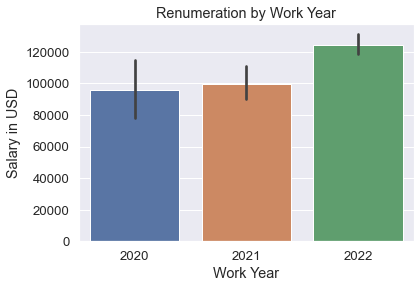

In [197]:
#Salary by work year

sns.barplot(x='work_year', y='salary_in_usd', data=data)
plt.title('Renumeration by Work Year')
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")

#### Salary By Company Size

Text(0, 0.5, 'Salary in USD')

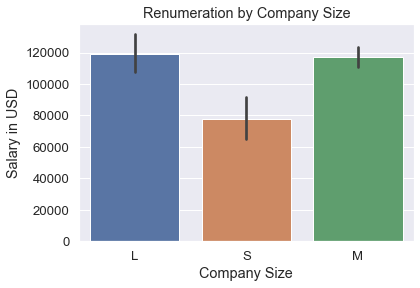

In [198]:
# salary by company size

sns.barplot(x='company_size', y='salary_in_usd', data=data)
plt.title('Renumeration by Company Size')
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")

#### Salary By Experience Level

Text(0, 0.5, 'Salary in USD')

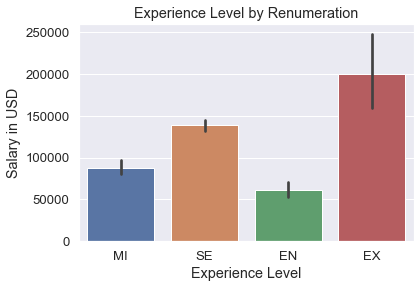

In [199]:
# salary by expereince level
sns.barplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Experience Level by Renumeration')
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")

##### Average Salary By Company Location

Text(0, 0.5, 'Salary in USD')

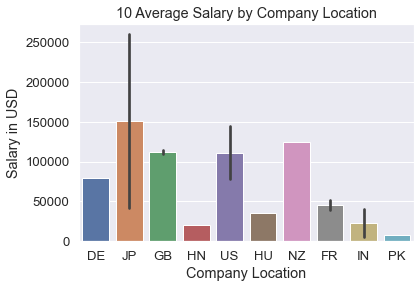

In [200]:
#Average salary by company location

sns.barplot(x=data.company_location[:20], y='salary_in_usd', data=data,)
plt.title('10 Average Salary by Company Location')
plt.xlabel("Company Location")
plt.ylabel("Salary in USD")

#### Highest Salary By Job Title

<Figure size 1440x720 with 0 Axes>

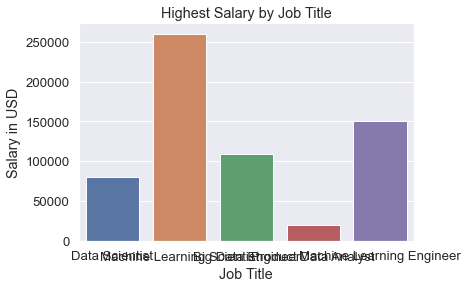

<Figure size 1440x720 with 0 Axes>

In [201]:
# highest salary by job title

sns.barplot(x=data.job_title[:5], y='salary_in_usd', data=data)
plt.title('Highest Salary by Job Title')
plt.xlabel("Job Title")
plt.ylabel("Salary in USD")

sns.set_theme(font_scale=0.5)
plt.figure(figsize=(20,10))


#              Company Location Analysis


#### Experience Level By Company Location

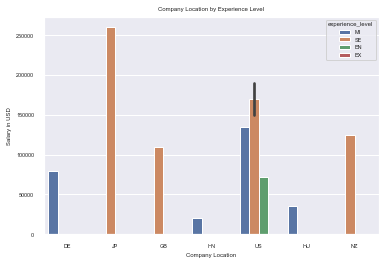

In [202]:
#Highest company location by experience level

sns.barplot(x=data.company_location[:10], y='salary_in_usd', data=data, hue='experience_level')
plt.title('Company Location by Experience Level')
plt.xlabel("Company Location")
plt.ylabel("Salary in USD")

sns.set_theme(font_scale=1.5)